## PYTHON PARA CIENCIA DE DATOS: PRACTICA

## Contenidos

* [00.Librerías y Carga de datos](#00.Librerías-y-Carga-de-datos)
* [01.Ejercicio 1: Análisis inicial](#01.Ejercicio-1:-Análisis-inicial)
    * [01.01.Número de muestras por cada variable:](#01.01.Número-de-muestras-por-cada-variable:)
    * [01.02.Media y desv estándar de variables numéricas:](#01.02.Media-y-desv-estándar-de-variables-numéricas:)
    * [01.03.Valor mín y máx de variables numéricas:](#01.03.Valor-mín-y-máx-de-variables-numéricas:)
* [02.Ejercicio 2: Agrupación de datos](#02.Ejercicio-2:-Agrupación-de-datos)
    * [02.01.Agrupación por tipo de dispositivo:](#02.01.Agrupación-por-tipo-de-dispositivo:)
    * [02.02.Agrupación por precio de venta:](#02.02.Agrupación-por-precio-de-venta:)
        * [02.02.01.Smartwatches <= media del precio:](#02.02.01.Smartwatches-<=-media-del-precio:)
        * [02.02.02.Smartwatches >= media del precio:](#02.02.01.Smartwatches->=-media-del-precio:)
        * [02.02.01.Fitnessbands <= media del precio:](#02.02.01.Fitnessbands-<=-media-del-precio:)
        * [02.02.01.Fitnessbands >= media del precio:](#02.02.01.Fitnessbands-<=-media-del-precio:)
    * [02.03.Agrupación por marca:](#02.03.Agrupación-por-marca:)
    * [02.04.Estadísticos de cada agrupación:](#02.04.Estadísticos-de-cada-agrupación:)
    * [02.05.Conclusiones:](#02.05.Conclusiones:)
* [03.Ejercicio 3: Duración batería/precio](#03.Ejercicio-3:-Duración-batería/precio)
* [04.Ejercicio 4: Ordenar en función al ratio anterior](#04.Ejercicio-4:-Ordenar-en-función-al-ratio-anterior)
* [05.Ejercicio 5: Total ingresos por marca](#05.Ejercicio-5:-Total-ingresos-por-marca)
* [06.Ejercicio 6: Diagrama de barras top 5 marcas](#06.Ejercicio-6:-Diagrama-de-barras-top-5-marcas)
* [07.Ejercicio 7: Correlación entre variables](#07.Ejercicio-7:-Correlación-entre-variables)
* [08.Ejercicio 8: Boxplot del precio/marca](#08.Ejercicio-8:-Boxplot-del-precio/marca)
* [09.Ejercicio 9: Análisis de variables](#09.Ejercicio-9:-Análisis-de-variables)

                                                .
                                                .
                                                .

#### Lo primero es la importación de librerias y carga de datos

## 00.Librerías y Carga de datos <a class="anchor" id="00.Librerías-y-Carga-de-datos"></a>

In [1]:
# Cargamos las liberías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Usando pandas cargamos el archivo .csv
raw_data = pd.read_csv("../01_Datos/Fitness_trackers.csv", decimal ='.', thousands = ",")

# Y comprobamos que se ha cargado correctamente con la función head()
raw_data.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN


                                                .
                                                .
                                                .

## 01.Ejercicio 1: Análisis inicial <a class="anchor" id="01.Ejercicio-1:-Análisis-inicial"></a>

In [3]:
# Vamos a visualizar la tabla completa para comprobar la consistencia en todas las filas
fitness_df = pd.DataFrame(raw_data)
fitness_df

# En un primer vistazo rápido nos damos cuenta de que la columna de Reviews no tiene ni un solo dato visible

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
560,Huawei,Smartwatch,Watch 36456,Black,55000,55000,AMOLED Display,4.1,Silicone,14,NaN
561,Huawei,Smartwatch,GT Fortuna-B19S Sport,Black,13990,20990,AMOLED Display,4.1,Elastomer,14,NaN
562,GOQii,FitnessBand,HR,Black,1999,1999,OLED Display,3.8,Silicone,7,NaN
563,GOQii,FitnessBand,Vital,Black,3499,3499,OLED Display,3.7,Thermoplastic polyurethane,7,NaN


                                                .

También salta a la vista que los precios no están en euros o en dólares. Tras una exploración rapida online, nos damos cuenta de que el precio parece estar en rupias.
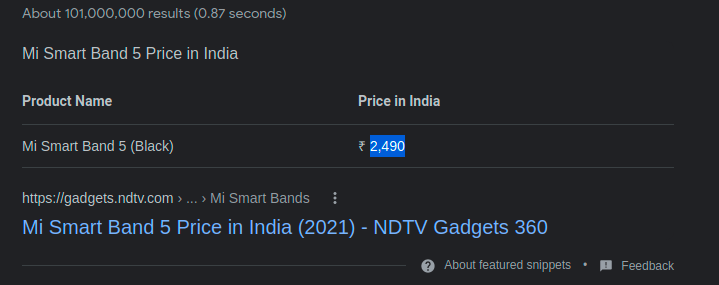

Tal y como se aprecia en la captura de google, la Xiaomi Smart Band 5 cuesta alrededor de 2490 rupias, que se acerca mucho al valor mostrado en la tabla.

Para que el análisis del dataset tenga un poco más de sentido, procedemos a transformar las variables de los precios a euros según el valor actual del euro-rupia.

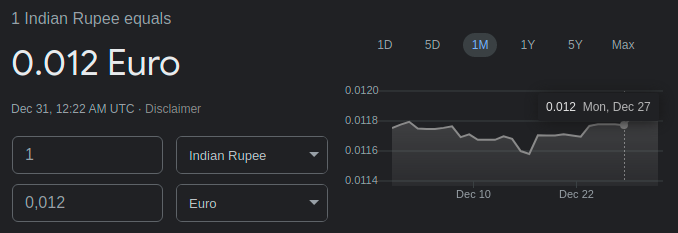

In [4]:
# Transformación de las variables "Selling Price" y "Original Price" a euros
# definimos la función
def precio_euros(df : object, column : str, conversion : float):
    df[column] = df[column] * conversion
    return df

# Ahora aplicamos la función a las variables a transformar
precio_euros(fitness_df, "Selling Price", 0.012)
precio_euros(fitness_df, "Original Price", 0.012)



,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,29.988,35.988,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,25.188,29.988,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,20.664,25.188,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,29.628,35.988,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,21.588,26.388,OLED Display,4.3,Plastic,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
560,Huawei,Smartwatch,Watch 36456,Black,660.000,660.000,AMOLED Display,4.1,Silicone,14,NaN
561,Huawei,Smartwatch,GT Fortuna-B19S Sport,Black,167.880,251.880,AMOLED Display,4.1,Elastomer,14,NaN
562,GOQii,FitnessBand,HR,Black,23.988,23.988,OLED Display,3.8,Silicone,7,NaN
563,GOQii,FitnessBand,Vital,Black,41.988,41.988,OLED Display,3.7,Thermoplastic polyurethane,7,NaN


                                                .

### 01.01.Número de muestras por cada variable:  <a class="anchor" id="01.01.Número-de-muestras-por-cada-variable:"></a>

In [5]:
# Vamos a explorar el dataframe con la funcion "info" esto nos dará información sobre las variablesz
fitness_df.info()

# Con esto confirmamos que las dos únicas columnas con valores NaN (faltantes) son "Rating" y "Reviews"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      565 non-null    object 
 1   Device Type                     565 non-null    object 
 2   Model Name                      565 non-null    object 
 3   Color                           565 non-null    object 
 4   Selling Price                   565 non-null    float64
 5   Original Price                  565 non-null    float64
 6   Display                         565 non-null    object 
 7   Rating (Out of 5)               514 non-null    float64
 8   Strap Material                  565 non-null    object 
 9   Average Battery Life (in days)  565 non-null    int64  
 10  Reviews                         78 non-null     float64
dtypes: float64(4), int64(1), object(6)
memory usage: 48.7+ KB


####       - Rating: 514 muestras sin valores "missing"
####       - Reviews: 78 muestras sin valores "missing"
####       - Resto de variables: 565 muestras (ningún valor faltante)

                                                .

### 01.02.Media y desv estándar de variables numéricas:  <a class="anchor" id="01.02.Media-y-desv-estándar-de-variables-numéricas:"></a>

In [28]:
# Vamos a crear una función para calcular la media y desv tipica de una variable
def estadisticos(df : object, column : str):
    media = df[column].mean().round(2)
    desv_est = df[column].std().round(2)
    est_df = pd.DataFrame({"Variable": column, "Media": media, "Desviacion estandar": desv_est}, index= [1])
    return est_df

# Ahora calculamos la media y desviación de cada variable numérica
sp = estadisticos(fitness_df, "Selling Price")
op = estadisticos(fitness_df, "Original Price")
ra5 = estadisticos(fitness_df, "Rating (Out of 5)")
avgbl = estadisticos(fitness_df, "Average Battery Life (in days)")
rev = estadisticos(fitness_df, "Reviews")

# Finalmente unimos todos los df de las variables en un unico dataframe para una mejor visualizacion
variables_num = [sp, op, ra5, avgbl, rev]

vnum_df = pd.concat(variables_num)
vnum_df

,Variable,Media,Desviacion estandar
1,Selling Price,265.32,238.98
1,Original Price,304.38,244.61
1,Rating (Out of 5),4.23,0.39
1,Average Battery Life (in days),9.03,7.87
1,Reviews,2492.95,5607.53


                                                .

### 01.03.Valor mín y máx de variables numéricas:  <a class="anchor" id="01.03.Valor-mín-y-máx-de-variables-numéricas:"></a>

In [29]:
# Vamos a crear una función para calcular valores minimos y maximos de una variable
def valores(df : object, column : str):
    valor_min = df[column].min().round(2)
    valor_max = df[column].max().round(2)
    est_df = pd.DataFrame({"Variable": column, "Valor mín": valor_min, "Valor máx": valor_max}, index= [1])
    return est_df

# Ahora calculamos valores minimos y maximos de cada variable numérica
sp_val = valores(fitness_df, "Selling Price")
op_val = valores(fitness_df, "Original Price")
ra5_val = valores(fitness_df, "Rating (Out of 5)")
avgbl_val = valores(fitness_df, "Average Battery Life (in days)")
rev_val = valores(fitness_df, "Reviews")

# Finalmente unimos todos los df de las variables en un unico dataframe para una mejor visualizacion
valores_num = [sp_val, op_val, ra5_val, avgbl_val, rev_val]

valnum_df = pd.concat(valores_num)
valnum_df

,Variable,Valor mín,Valor máx
1,Selling Price,14.34,1465.08
1,Original Price,19.19,1465.08
1,Rating (Out of 5),2.00,5.00
1,Average Battery Life (in days),1.00,45.00
1,Reviews,2.00,23426.00


                                                .
                                                .
                                                .